# TAREFA 5 - Perceptron

<ul>
<li>Diego Santos Gonçalves - 20183012537</li>
<li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
<li>numpy </li>
<li>pandas</li>
<li>sklearn - para dividir o dataframe em teste e treino </li>
<li>matplotlib - para criação dos gráficos </li>
</ul>



In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Função de ativação

In [2]:
def sigmoidal(pre_y):
    maior = 0
    pos = 0
    y = [0,0,0]
    for i,x in enumerate(pre_y):
        if x >= 0:
            parte_exp = math.exp(-x)
            sig = 1 / (1 + parte_exp)
        else:
            parte_exp = math.exp(x)
            sig = parte_exp / (1 + parte_exp)
        if sig >= maior:
            maior = sig
            pos = i
    
    y[pos] = 1
    
    return y
        
            
    
def degrau(pre_y):
    y = []
    for x in pre_y:
        if x >= 0:
            y.append(1)
        else:
            y.append(0)
    return y

## Perceptron e Teste de precisão

In [3]:
# perceptron ----------------------------------------TERMINAR
def perceptron (max_it, taxa_aprendizagem, X, D, funcao_ativacao):
    W = np.array([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])
    b = np.array([0,0,0])
    iter_count: int = 1
    E = 1
    while (iter_count < max_it and E>0):
        E = 0
        for i,x in X.iterrows():
            y = funcao_ativacao(np.matmul(W, np.array(x.array)) + b)
            erro = np.array(D[i]) - np.array(y)
            b = b + taxa_aprendizagem*erro
            W = W + taxa_aprendizagem*(np.outer(erro,x.array))
            E = E + erro.dot(erro)
        iter_count = iter_count + 1
    
    return (W,b)

# Acuracia
def testa_acuracia (X, D, W, b, funcao_ativacao):
    acertos = 0
    for i,x in X.iterrows():
        Y = funcao_ativacao(W.dot(np.array(x.array)) + b)
        erro = np.array(D[i]) - np.array(Y)
        
        if all (valor == 0 for valor in erro):
            acertos = acertos + 1
    taxa_acertos = 100*(acertos/len(X))
    return (acertos, taxa_acertos)


## Dataset

In [4]:
# Perceptron

# Ler do dataset
dataset = pd.read_table("iris.data", sep=",",header=None)
dataset.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Classe']

# Bag of class
dict_class = {
    'Iris-setosa':[1,0,0],
    'Iris-versicolor': [0,1,0],
    'Iris-virginica': [0,0,1]
}

dataset["D"] = dataset["Classe"].apply(lambda x: dict_class[x])

dataset

,sepal length,sepal width,petal length,petal width,Classe,D
0,5.1,3.5,1.4,0.2,Iris-setosa,"[1, 0, 0]"
1,4.9,3.0,1.4,0.2,Iris-setosa,"[1, 0, 0]"
2,4.7,3.2,1.3,0.2,Iris-setosa,"[1, 0, 0]"
3,4.6,3.1,1.5,0.2,Iris-setosa,"[1, 0, 0]"
4,5.0,3.6,1.4,0.2,Iris-setosa,"[1, 0, 0]"
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,"[0, 0, 1]"
146,6.3,2.5,5.0,1.9,Iris-virginica,"[0, 0, 1]"
147,6.5,3.0,5.2,2.0,Iris-virginica,"[0, 0, 1]"
148,6.2,3.4,5.4,2.3,Iris-virginica,"[0, 0, 1]"


## Divisão em teste e treino

Para dividir o dataset em treino e teste, utilizamos a função ```train_test_split()``` passando como parâmetro a proporção do dataset que será utilizado para o teste. A função irá dividir o dataframe randomicamente de forma estratificada através do parâmetro ```stratify``` passando a classe para ele.

In [5]:
df_treino, df_teste = train_test_split(dataset, test_size=0.3, random_state=42, stratify = dataset["Classe"])
df_treino

,sepal length,sepal width,petal length,petal width,Classe,D
98,5.1,2.5,3.0,1.1,Iris-versicolor,"[0, 1, 0]"
68,6.2,2.2,4.5,1.5,Iris-versicolor,"[0, 1, 0]"
19,5.1,3.8,1.5,0.3,Iris-setosa,"[1, 0, 0]"
143,6.8,3.2,5.9,2.3,Iris-virginica,"[0, 0, 1]"
99,5.7,2.8,4.1,1.3,Iris-versicolor,"[0, 1, 0]"
...,...,...,...,...,...,...
37,4.9,3.1,1.5,0.1,Iris-setosa,"[1, 0, 0]"
79,5.7,2.6,3.5,1.0,Iris-versicolor,"[0, 1, 0]"
33,5.5,4.2,1.4,0.2,Iris-setosa,"[1, 0, 0]"
94,5.6,2.7,4.2,1.3,Iris-versicolor,"[0, 1, 0]"


In [6]:
versicolor = 0
setosa = 0
virginica = 0
for data in df_teste["Classe"]:
    if "versicolor" in data:
        versicolor += 1
    if "setosa" in data:
        setosa += 1
    if "virginica" in data:
        virginica += 1
print("Teste de proporcao:")
print(versicolor, setosa, virginica)
df_teste

Teste de proporcao:
15 15 15


,sepal length,sepal width,petal length,petal width,Classe,D
107,7.3,2.9,6.3,1.8,Iris-virginica,"[0, 0, 1]"
63,6.1,2.9,4.7,1.4,Iris-versicolor,"[0, 1, 0]"
133,6.3,2.8,5.1,1.5,Iris-virginica,"[0, 0, 1]"
56,6.3,3.3,4.7,1.6,Iris-versicolor,"[0, 1, 0]"
127,6.1,3.0,4.9,1.8,Iris-virginica,"[0, 0, 1]"
140,6.7,3.1,5.6,2.4,Iris-virginica,"[0, 0, 1]"
53,5.5,2.3,4.0,1.3,Iris-versicolor,"[0, 1, 0]"
69,5.6,2.5,3.9,1.1,Iris-versicolor,"[0, 1, 0]"
20,5.4,3.4,1.7,0.2,Iris-setosa,"[1, 0, 0]"
141,6.9,3.1,5.1,2.3,Iris-virginica,"[0, 0, 1]"


## Testes

Degrau unitário:

In [7]:
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
taxa_aprendizagem = 0.4
max_iter = 300

(W,b) = perceptron(max_iter, taxa_aprendizagem, X, D, degrau)
print("W = ", W)
print("bias =", b)

W =  [[  0.     0.52  -0.6   -0.32]
 [ -0.28 -21.68  21.84 -47.6 ]
 [-26.76 -23.76  29.2   79.6 ]]
bias = [  0.  44. -56.]


In [8]:
X = df_teste.drop(["Classe","D"], axis= 1)
D = df_teste["D"]
acerto, taxa_acerto = testa_acuracia (X, D, W, b, degrau)
print(acerto, " em ", len(df_teste))
print("Taxa de acerto: ", taxa_acerto)

33  em  45
Taxa de acerto:  73.33333333333333


Sigmoidal:

In [9]:
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
taxa_aprendizagem = 0.4
max_iter = 300

(W,b) = perceptron(max_iter, taxa_aprendizagem, X, D, sigmoidal)
print("W = ", W)
print("bias =", b)

W =  [[ 2.460e+01  4.920e+01 -6.664e+01 -3.508e+01]
 [ 4.000e-02 -1.896e+01  3.500e+01 -5.044e+01]
 [-2.464e+01 -3.024e+01  3.164e+01  8.552e+01]]
bias = [  7.6  31.2 -38.8]


In [10]:
X = df_teste.drop(["Classe","D"], axis= 1)
D = df_teste["D"]
acerto, taxa_acerto = testa_acuracia (X, D, W, b, sigmoidal)
print(acerto, " em ", len(df_teste))
print("Taxa de acerto: ", taxa_acerto)

41  em  45
Taxa de acerto:  91.11111111111111


No experimento inicial. Fixando a taxa de aprendizagem de 40% e o número máximo de épocas de 300, obtivemos, para a função de ativação usando degrau unitário, uma taxa de acerto de 73,33%, e para função de ativação sigmoidal, 91.11%. Deste modo, tivemos que a função de ativação sigmoidal teve um melhor desempenho do que a função de ativação degrau. Note que, foi utilizado o mesmo conjunto de dados para treino e para teste para os dois algoritmos.

## Gráficos e análise

### Taxa de acerto por Numero de épocas
Os primeiros gráficos representam a análise da taxa de acertos em razão com o número épocas utilizados (fixando o valor da taxa de aprendizado em 50%). Aqui podemos notar que, usando a função degrau, a taxa de acerto varia entre 60% e 80% aproximadamente, enquanto que para função sigmoidal entre 90% e 97%, aproximadamente. No gráfico da função é degrau, foi possível perceber que com 1000 epócas a taxa de acerto para o dataset de teste decaiu comparado aos resultados anteriores.

In [11]:
# Funcao degrau
taxa_aprendizagem = 0.5 #fixamos a taxa de aprendizagem
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
X_test = df_teste.drop(["Classe","D"], axis= 1)
D_test = df_teste["D"]

epoca = [x for x in range(0,1000,50)]
arr_taxa_acerto = []
for i in epoca:
    (W,b) = perceptron(i, taxa_aprendizagem, X, D, degrau)
    acerto, taxa_acerto = testa_acuracia (X_test, D_test, W, b, degrau)
    arr_taxa_acerto.append(taxa_acerto)
    

    

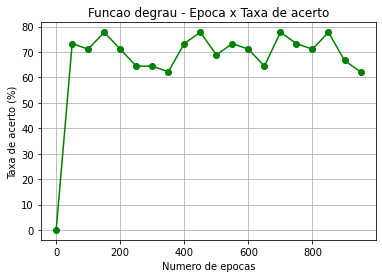

In [25]:
plt.plot(epoca, arr_taxa_acerto,"go-",color="Green")
plt.title("Funcao degrau - Epoca x Taxa de acerto")
plt.grid(True)
plt.xlabel("Numero de epocas")
plt.ylabel("Taxa de acerto (%)")
plt.show()

In [13]:
#Funcao Sigmoidal
taxa_aprendizagem = 0.5 #fixamos a taxa de aprendizagem
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
X_test = df_teste.drop(["Classe","D"], axis= 1)
D_test = df_teste["D"]

epoca = [x for x in range(0,1000,50)]
arr_taxa_acerto_sigmoid = []
for i in epoca:
    (W,b) = perceptron(i, taxa_aprendizagem, X, D, sigmoidal)
    acerto, taxa_acerto = testa_acuracia (X_test, D_test, W, b, sigmoidal)
    arr_taxa_acerto_sigmoid.append(taxa_acerto)

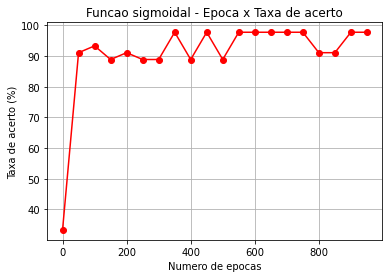

In [24]:
plt.plot(epoca, arr_taxa_acerto_sigmoid, "ro-", color="Red")
plt.title("Funcao sigmoidal - Epoca x Taxa de acerto")
plt.grid(True)
plt.xlabel("Numero de epocas")
plt.ylabel("Taxa de acerto (%)")
plt.show()

### Taxa de acerto por taxa de aprendizado
Aqui podemos notar que, na função de ativação degrau, a taxa de acerto variou entre 68% e 78%, aproximadamente. Já para a função de ativação sigmoidal, houve uma variação de 88% a 98%, aproximadamente. Os valores de taxa de acerto foram inconstantes para análise mais foi possível perceber que o melhor resultado foi quando a taxa de aprendizado foi de 1%. 

In [27]:
# Funcao degrau
epoca = 500 #fixamos a epoca
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
X_test = df_teste.drop(["Classe","D"], axis= 1)
D_test = df_teste["D"]

taxa_aprendizagem = [x for x in np.arange(0.01,0.7,0.05)]
arr_taxa_acerto = []
for taxa in taxa_aprendizagem:
    (W,b) = perceptron(epoca, taxa, X, D, degrau)
    acerto, taxa_acerto = testa_acuracia (X_test, D_test, W, b, degrau)
    arr_taxa_acerto.append(taxa_acerto)

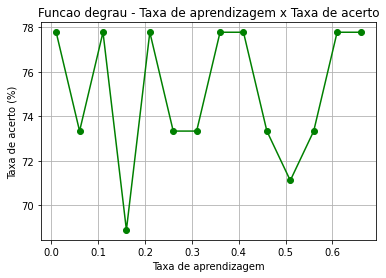

In [29]:
plt.plot(taxa_aprendizagem, arr_taxa_acerto,"go-",color="Green")
plt.title("Funcao degrau - Taxa de aprendizagem x Taxa de acerto")
plt.grid(True)
plt.xlabel("Taxa de aprendizagem")
plt.ylabel("Taxa de acerto (%)")
plt.show()

In [30]:
#Funcao Sigmoidal
epoca = 500 #fixamos a epoca
X = df_treino.drop(["Classe","D"], axis= 1)
D = df_treino["D"]
X_test = df_teste.drop(["Classe","D"], axis= 1)
D_test = df_teste["D"]

taxa_aprendizagem = [x for x in np.arange(0.01,0.7,0.05)]
arr_taxa_acerto_sigmoid = []
for taxa in taxa_aprendizagem:
    (W,b) = perceptron(epoca, taxa, X, D, sigmoidal)
    acerto, taxa_acerto = testa_acuracia (X_test, D_test, W, b, sigmoidal)
    arr_taxa_acerto_sigmoid.append(taxa_acerto)

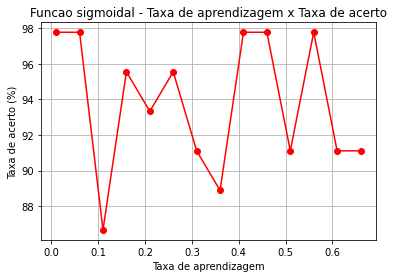

In [31]:
plt.plot(taxa_aprendizagem, arr_taxa_acerto_sigmoid, "ro-", color="Red")
plt.title("Funcao sigmoidal - Taxa de aprendizagem x Taxa de acerto")
plt.grid(True)
plt.xlabel("Taxa de aprendizagem")
plt.ylabel("Taxa de acerto (%)")
plt.show()

Após compararmos os gráficos gerados, podemos perceber que o sigmoidal apresentou um desempenho superior se comporado com o degrau.